# 2

### i

In [2]:
theta <- 0.08
theta_1 <- theta ^ 2
n <- 1000

In [3]:
print(theta_1)

[1] 0.0064


In [4]:
E.A <- n * theta_1
print(E.A)

[1] 6.4


In [5]:
Var.A <- n * theta_1 * (1 - theta_1)
print(Var.A)

[1] 6.35904


### ii

In [6]:
p.5_10 <- pbinom(10, 1000, theta_1) - pbinom(4, 1000, theta_1)
cat("P(5 <= A <= 10) =", p.5_10, "\n")

P(5 <= A <= 10) = 0.7050234 


### iii

In [7]:
k.95 <- qbinom(0.95, 1000, theta_1)
cat("95th Percentile value for k =", k.95, "\n")
cat("P( A <=", k.95, ") =", pbinom(k.95, 1000, theta_1), "\n")

95th Percentile value for k = 11 
P( A <= 11 ) = 0.9697557 


# 4

### i

In [8]:
n <- 25
k <- 3
x <- seq(from = 0, to = 1,length.out = 1e4)

In [9]:
a <- 3
b <- 30
prior_dist <- dbeta(x, a, b)

In [10]:
prior_mean <- a / (a + b)
prior_var <- (a * b) / ((a + b)**2 * (a + b + 1))
print(list(prior_mean, prior_var))

[[1]]
[1] 0.09090909

[[2]]
[1] 0.002430724



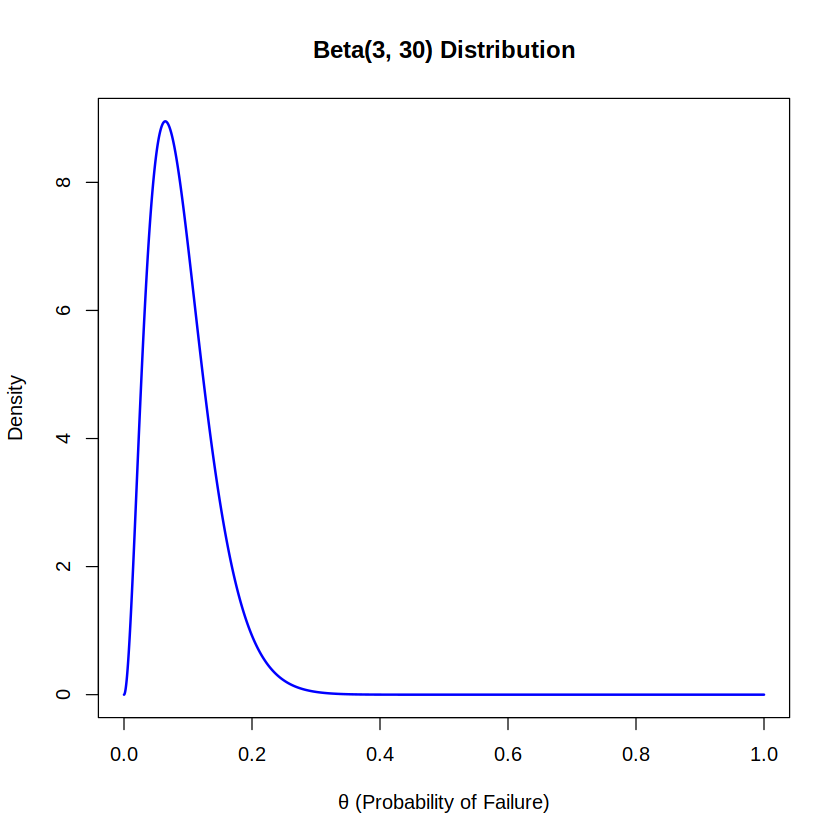

In [11]:
plot(x, prior_dist, type = "l", lwd = 2, 
     main = "Beta(3, 30) Distribution", xlab = "θ (Probability of Failure)",
     ylab = "Density", col = "blue")

In [12]:
print(1 - pbeta(0.20, 3, 30))

[1] 0.03169127


### ii

In [13]:
a_n <- k + a
b_n <- (n - k) + b 
print(list(a_n, b_n))

[[1]]
[1] 6

[[2]]
[1] 52



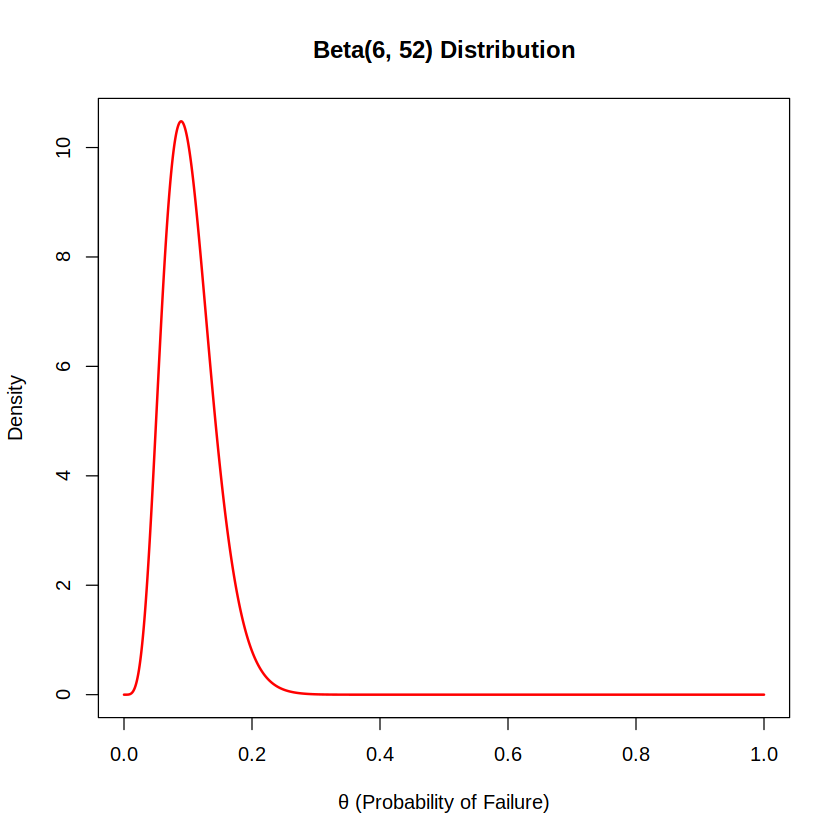

In [14]:
post_dist <- dbeta(x, a_n, b_n)
plot(x, post_dist, type = "l", lwd = 2, 
     main = "Beta(6, 52) Distribution", xlab = "θ (Probability of Failure)",
     ylab = "Density", col = "red")

In [15]:
post_mean <- a_n / (a_n + b_n)
post_var <- (a_n * b_n) / ((a_n + b_n)^2 * (a_n + b_n + 1))
print(list(post_mean, post_var))

[[1]]
[1] 0.1034483

[[2]]
[1] 0.001571978



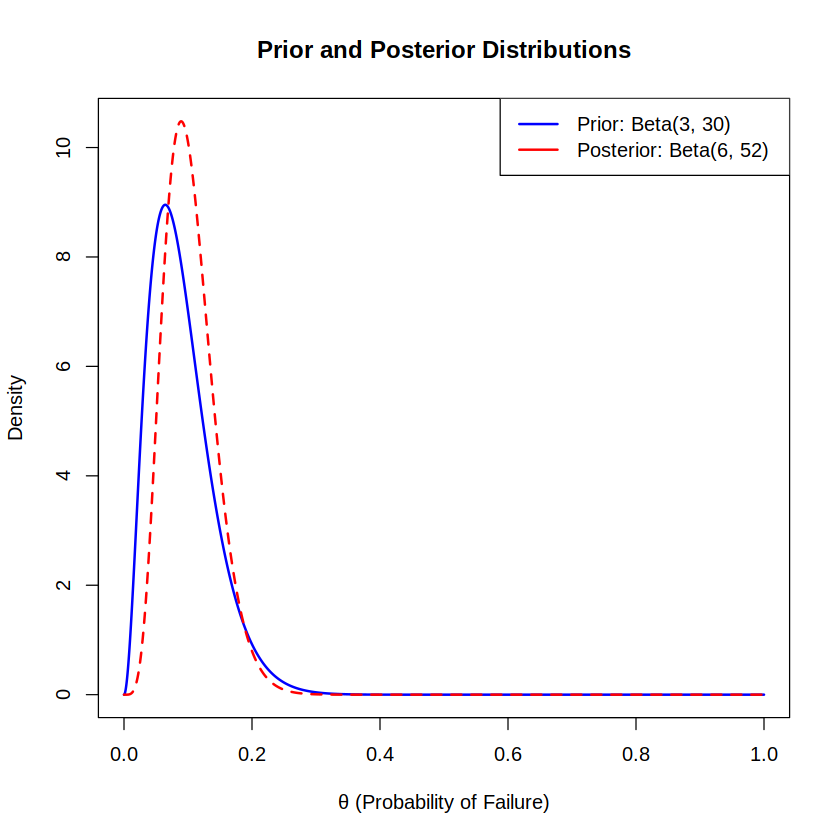

In [16]:
plot(x, prior_dist, type = "l", lwd = 2, col = "blue",
     main = "Prior and Posterior Distributions",
     xlab = "θ (Probability of Failure)",
     ylab = "Density",
     ylim = c(0, max(c(prior_dist, post_dist))))

lines(x, post_dist, type = "l", lwd = 2, col = "red", lty = 2)

legend("topright", 
       legend = c("Prior: Beta(3, 30)", "Posterior: Beta(6, 52)"),
       col = c("blue", "red"), 
       lwd = 2)

### iv


Posterior for θ:
Mean: 0.1034516 
Variance: 0.001584095 
95% Interval: 0.03957243 0.1940732 

Posterior for θ1:
Mean: 0.0122863 
Variance: 9.221551e-05 
95% Interval: 0.001565977 0.03766439 

Posterior for θ2:
Mean: 0.1946168 
Variance: 0.004945259 
95% Interval: 0.07757889 0.3504819 

Posterior for θ3:
Mean: 0.04282091 
Variance: 0.000951169 
95% Interval: 0.006018484 0.1228376 


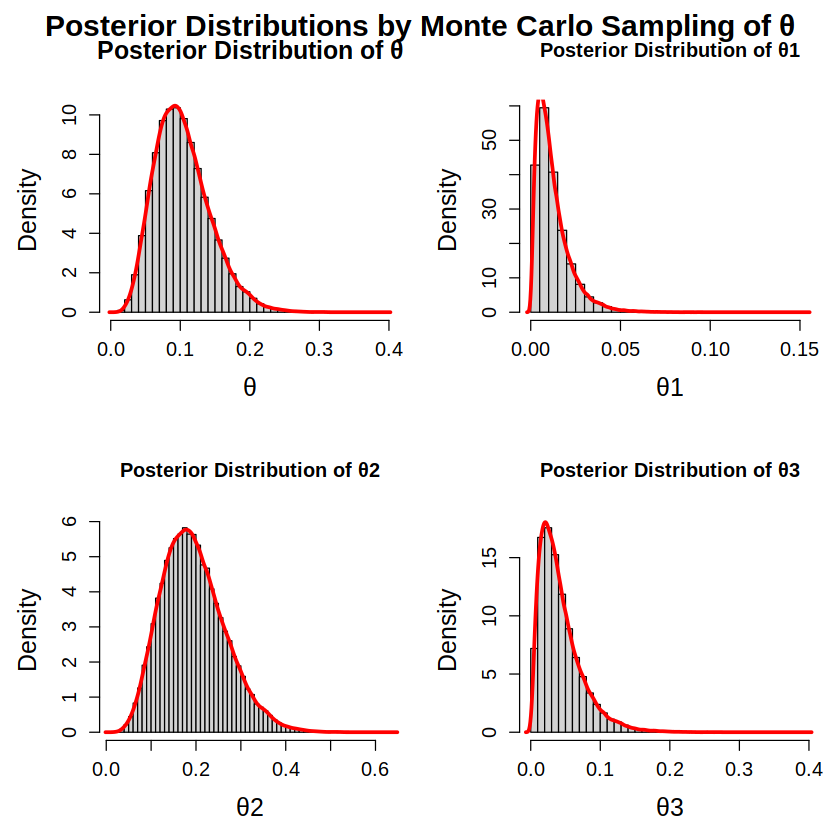

In [17]:
par(mfrow = c(2, 2), mar = c(5, 5, 5, 1))
mc_post_theta <- rbeta(1e5, a_n, b_n)

cat("\nPosterior for θ:\n")
cat("Mean:", mean(mc_post_theta), "\n")
cat("Variance:", var(mc_post_theta), "\n")
cat("95% Interval:", quantile(mc_post_theta, c(0.025, 0.975)), "\n")
hist(mc_post_theta, breaks = 50, freq = FALSE,
     main = "Posterior Distribution of θ",
     xlab = "θ", cex.lab = 1.5, cex.main = 1.5, cex.axis = 1.2)
lines(density(mc_post_theta), col = "red", lwd = 3)

mtext("Posterior Distributions by Monte Carlo Sampling of θ", 
      side = 3, line = -2, outer = TRUE, cex = 1.5, font = 2)

mc_post_theta_1 <- mc_post_theta^2
cat("\nPosterior for θ1:\n")
cat("Mean:", mean(mc_post_theta_1), "\n")
cat("Variance:", var(mc_post_theta_1), "\n")
cat("95% Interval:", quantile(mc_post_theta_1, c(0.025, 0.975)), "\n")
hist(mc_post_theta_1, breaks = 50, freq = FALSE,
     main = "Posterior Distribution of θ1",
     xlab = "θ1", cex.lab = 1.5, cex.main = 1.2, cex.axis = 1.2)
lines(density(mc_post_theta_1), col = "red", lwd = 3)

mc_post_theta_2 <- 2 * mc_post_theta - mc_post_theta^2
cat("\nPosterior for θ2:\n")
cat("Mean:", mean(mc_post_theta_2), "\n")
cat("Variance:", var(mc_post_theta_2), "\n")
cat("95% Interval:", quantile(mc_post_theta_2, c(0.025, 0.975)), "\n")
hist(mc_post_theta_2, breaks = 50, freq = FALSE,
     main = "Posterior Distribution of θ2",
     xlab = "θ2", cex.lab = 1.5, cex.main = 1.2, cex.axis = 1.2)
lines(density(mc_post_theta_2), col = "red", lwd = 3)

mc_post_theta_3 <- (mc_post_theta ^ 4) - (4 * mc_post_theta ^ 3) +
  (4 * mc_post_theta^2)
cat("\nPosterior for θ3:\n")
cat("Mean:", mean(mc_post_theta_3), "\n")
cat("Variance:", var(mc_post_theta_3), "\n")
cat("95% Interval:", quantile(mc_post_theta_3, c(0.025, 0.975)), "\n")
hist(mc_post_theta_3, breaks = 50, freq = FALSE,
     main = "Posterior Distribution of θ3",
     xlab = "θ3", cex.lab = 1.5, cex.main = 1.2, cex.axis = 1.2)
lines(density(mc_post_theta_3), col = "red", lwd = 3)

# 5

### i

In [18]:
mc_post_failures <- rbinom(length(mc_post_theta_3),
                          size = 1000, prob = mc_post_theta_3)

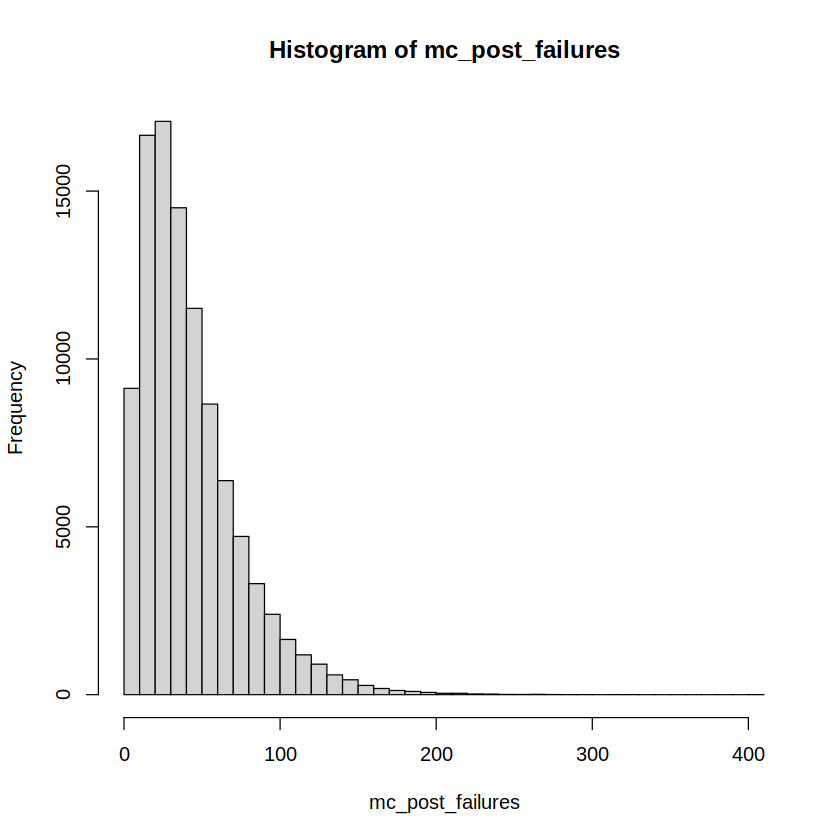

In [19]:
hist(mc_post_failures, breaks=50)

In [20]:
mc_post_payments <- ifelse(mc_post_failures < 50, 
                          1000,
                          ifelse(mc_post_failures < 100, 
                                 1000 - mc_post_failures, 
                                 0))


In [21]:
print(sum(mc_post_payments) / length((mc_post_payments)))

[1] 923.2691


### ii

In [22]:
a_n_11 <- k + 1
b_n_11 <- (n - k) + 1
mc_post_theta_11 <- rbeta(1e5, a_n_11, b_n_11)
mc_post_theta_3_11 <- (mc_post_theta_11 ^ 4) - (4 * mc_post_theta_11 ^ 3) +
  (4 * mc_post_theta_11^2)

[1] 0.08497096
[1] 0.004601789
       2.5%       97.5% 
0.007343206 0.262608656 


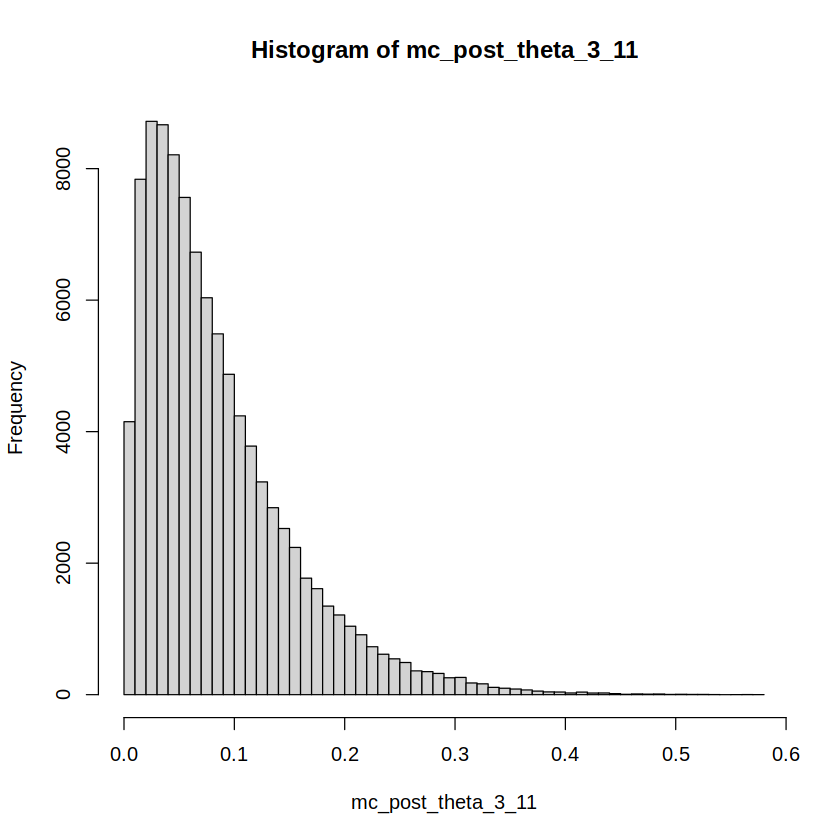

In [23]:
print(mean(mc_post_theta_3_11))
print(var(mc_post_theta_3_11) )
print(quantile(mc_post_theta_3_11, c(0.025, 0.975)))
hist(mc_post_theta_3_11, breaks=50)

In [24]:
mc_post_failures_11 <- rbinom(length(mc_post_theta_3_11),
                             size = 1000, prob = mc_post_theta_3_11)

In [25]:
mc_post_payments_11 <- ifelse(mc_post_failures_11 < 50, 
                              1000,
                              ifelse(mc_post_failures_11 < 100, 
                                     1000 - mc_post_failures_11, 
                                     0))


In [26]:
print(sum(mc_post_payments_11) / length((mc_post_payments_11)))

[1] 657.2327
